In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

dfUser       = pd.read_csv("../applicant_material/user.csv") 
dfJobs       = pd.read_csv("../applicant_material/job_desc.csv") 
dfAll        = pd.concat([dfUser, dfJobs], axis=1)

In [40]:
dfAll.head(n= 5)

,user_id,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,...,v55,v56,v6,v7,v8,v9,job_title_full,salary,company,user_id
0,U1,1,0.620573,0.018662,0.100803,0.080898,0.420417,0.817681,0.147355,0.446812,...,0.148969,0.707921,0.751510,0.349078,0.337132,0.807632,Junior Manager Innovation Lab - France (M/F/D),51000.0,g,U1
1,U2,1,0.972502,0.870277,0.504887,0.995163,0.179480,0.608719,0.245085,0.851246,...,0.400617,0.563469,0.989583,0.073514,0.095885,0.890821,Junior Product Manager - Mobile,70000.0,b,U2
2,U3,1,0.240756,0.546440,0.521399,0.402420,0.640444,NaN,0.184515,0.395058,...,0.761972,0.976820,0.264505,0.513135,0.978387,0.620669,Junior Brand Marketing Manager - Mobile (M/F/D),59000.0,g,U3
3,U4,1,0.004854,0.433188,0.250801,0.242680,0.713586,0.210186,0.977472,0.375024,...,0.516972,0.742984,0.232344,0.305115,0.080069,0.297233,Product Analyst - Pricing & Forecasting (M/F/D),NaN,d,U4
4,U5,1,0.835250,0.476812,0.764354,0.449753,0.524924,0.807181,0.294023,0.475043,...,0.724384,0.123647,0.091980,0.581444,0.093941,0.612623,Online Marketing Manager,64000.0,h,U5


In [33]:
dfAll.describe()

,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,v17,...,v52,v53,v54,v55,v56,v6,v7,v8,v9,salary
count,2000.000000,1973.000000,1954.000000,1952.000000,1951.000000,1962.000000,1958.000000,1950.000000,1956.000000,1950.000000,...,1967.000000,2000.000000,1956.000000,1954.000000,1959.000000,1953.000000,1973.000000,1964.000000,1960.000000,613.000000
mean,0.576000,0.498277,0.492953,0.512919,0.495935,0.501302,0.498279,0.493254,0.500801,0.498894,...,0.499224,0.488602,0.510888,0.506247,0.507085,0.518108,0.503072,0.490166,0.505676,59980.424144
std,0.494314,0.290705,0.292949,0.292198,0.289256,0.291726,0.285457,0.289497,0.294198,0.289280,...,0.286895,0.287781,0.290152,0.290164,0.288418,0.285448,0.287764,0.289001,0.289645,5912.455708
min,0.000000,0.000637,0.000684,0.000415,0.000252,0.000101,0.000615,0.000026,0.000135,0.000502,...,0.000747,0.000848,0.000045,0.000631,0.000210,0.000190,0.000517,0.000089,0.000190,50000.000000
25%,0.000000,0.253629,0.232455,0.259687,0.243370,0.246970,0.252552,0.234377,0.240539,0.246884,...,0.249614,0.227925,0.257998,0.258180,0.263299,0.272024,0.259133,0.228752,0.258320,55000.000000
50%,1.000000,0.492043,0.496000,0.518988,0.504855,0.495736,0.491670,0.495598,0.501477,0.497372,...,0.499688,0.487221,0.522328,0.500106,0.507929,0.517658,0.507351,0.491922,0.513034,60000.000000
75%,1.000000,0.754523,0.751359,0.761308,0.746220,0.753858,0.751808,0.741246,0.761761,0.754247,...,0.745740,0.728298,0.766359,0.756406,0.761204,0.770938,0.749091,0.740399,0.747856,65000.000000
max,1.000000,0.999875,0.999463,0.999307,0.998632,0.999927,0.998947,0.999577,0.999976,0.999436,...,0.999516,0.999680,0.999465,0.998761,0.999872,0.998799,0.998853,0.999755,0.999900,70000.000000


In [9]:
####Test Uniform distr random variable
#df = pd.DataFrame(np.random.uniform(0,1,size=(2000, 4)), columns=list('ABCD'))
#df.describe()

## Correlation

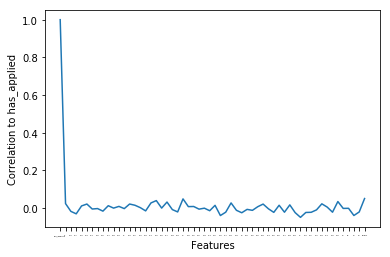

In [145]:
corrTo_has_applied = dfAll.corr().iloc[0,:]
fig,ax = plt.subplots()
plt.plot(corrTo_has_applied)
plt.ylabel('Correlation to has_applied')
plt.xlabel('Features',)
ax.tick_params(axis="x", labelsize=2)
plt.savefig('results/correlation.pdf')

,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,v17,...,v52,v53,v54,v55,v56,v6,v7,v8,v9,salary
has_applied,1.000000,0.024147,-0.017162,-0.030218,0.011672,0.021725,-0.004660,-0.002335,-0.015920,0.012841,...,-0.009269,0.022879,0.005548,-0.021517,0.034930,-0.001500,-0.000869,-0.039097,-0.020220,0.050925
v1,0.024147,1.000000,0.017716,0.012478,0.005112,0.030013,-0.003393,-0.013926,-0.030818,-0.034218,...,0.036701,-0.003479,-0.017485,-0.003679,-0.007623,-0.011191,0.020860,0.009241,-0.001096,-0.002472
v10,-0.017162,0.017716,1.000000,0.019175,-0.004124,0.007820,0.011500,-0.001875,-0.054079,-0.057950,...,-0.002509,0.011666,0.034665,0.034484,0.015456,0.008597,0.035321,0.049380,-0.032353,0.031667
v11,-0.030218,0.012478,0.019175,1.000000,-0.014317,0.018200,-0.010021,0.016663,0.017537,-0.018584,...,0.011850,-0.034746,-0.010083,-0.027615,0.002295,-0.012892,-0.034232,-0.031763,-0.025427,0.046485
v12,0.011672,0.005112,-0.004124,-0.014317,1.000000,-0.014548,0.037597,0.033628,0.002408,-0.012459,...,-0.013431,-0.025820,-0.005829,-0.029763,-0.028485,-0.010496,0.005632,0.009092,0.005336,0.053395
v13,0.021725,0.030013,0.007820,0.018200,-0.014548,1.000000,-0.031788,0.002680,-0.005187,-0.009199,...,-0.025758,-0.033838,0.010505,-0.021178,-0.024734,-0.002033,0.016763,0.041555,0.021841,0.041239
v14,-0.004660,-0.003393,0.011500,-0.010021,0.037597,-0.031788,1.000000,0.018577,0.009778,-0.032814,...,0.000284,0.016773,0.000675,0.031388,0.030513,0.014684,0.014648,0.005203,-0.012094,0.054009
v15,-0.002335,-0.013926,-0.001875,0.016663,0.033628,0.002680,0.018577,1.000000,0.004227,-0.010232,...,-0.004843,0.022656,0.011807,0.026858,-0.044770,-0.019943,0.015363,-0.031594,0.053898,-0.037906
v16,-0.015920,-0.030818,-0.054079,0.017537,0.002408,-0.005187,0.009778,0.004227,1.000000,-0.023658,...,0.000644,0.008905,-0.038061,-0.021192,-0.024150,-0.015592,-0.004220,0.011012,0.025529,0.039405
v17,0.012841,-0.034218,-0.057950,-0.018584,-0.012459,-0.009199,-0.032814,-0.010232,-0.023658,1.000000,...,0.009977,0.003871,0.034388,0.053350,0.008316,0.045707,-0.017042,-0.013762,0.017983,0.025751


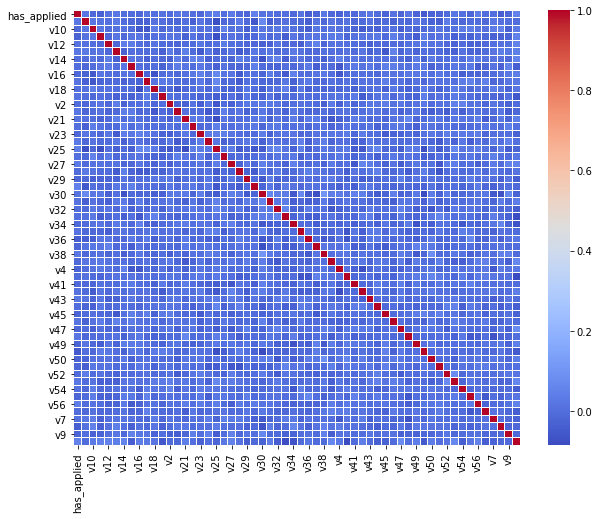

In [199]:
import seaborn as sns 
plt.figure(figsize = (10,8))
g = sns.heatmap(dfAll.corr(),annot=False, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)
plt.savefig('results/correlation_Seaborn.pdf')
dfAll.corr()

## Histograms features users

/home/maxi/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/maxi/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


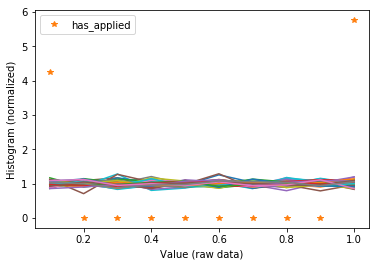

In [70]:
for column in dfUser[:]:
    try:
        freqs,bins = np.histogram(dfUser[column],range = (0,1), density = True)
    except TypeError:
        pass
    if column == 'has_applied':
        plt.plot(bins[1:],freqs, '*',label = column)
    else:
        plt.plot(bins[1:],freqs)
plt.legend(ncol = 6)
plt.ylabel('Histogram (normalized)')
plt.xlabel('Value (raw data)')
#plt.savefig('results/pdfsOfFeatures.pdf')

In [95]:
dfAll.isnull().sum()

user_id              0
has_applied          0
v1                  27
v10                 46
v11                 48
v12                 49
v13                 38
v14                 42
v15                 50
v16                 44
v17                 50
v18                 48
v19                 49
v2                  40
v20                 49
v21                 41
v22                 37
v23                  0
v24                 30
v25               1414
v26                 37
v27                 38
v28                 26
v29                 35
v3                  46
v30               1378
v31                 36
v32                 52
v33                 33
v34                 51
                  ... 
v37                 31
v38                 39
v39                 44
v4                  41
v40                 45
v41                 42
v42                 43
v43                 31
v44                 41
v45                  0
v46                 43
v47                 39
v48        

# Jobs data

In [205]:
dfJobs.head(100)

,job_title_full,salary,company,user_id
0,Junior Manager Innovation Lab - France (M/F/D),51000.0,g,U1
1,Junior Product Manager - Mobile,70000.0,b,U2
2,Junior Brand Marketing Manager - Mobile (M/F/D),59000.0,g,U3
3,Product Analyst - Pricing & Forecasting (M/F/D),NaN,d,U4
4,Online Marketing Manager,64000.0,h,U5
5,Marketing Analyst - New Ventures,NaN,g,U6
6,Junior Manager Innovation Lab - France (M/F/D),NaN,e,U7
7,Lead Growth Hacker - New Ventures,NaN,c,U8
8,Senior Sustainability Manager,NaN,d,U9
9,Lead Data Analyst - Pricing Team (m/f/d),NaN,f,U10


In [87]:
dfJobs['company'].value_counts(normalize = False,dropna = False)

d    287
e    257
b    256
h    248
f    246
a    240
c    235
g    231
Name: company, dtype: int64

In [88]:
dfJobs['job_title_full'].value_counts(normalize = False,dropna = False)

Lead Online Marketing Manager - (Remote) M/F/D            22
 Product Analyst - Pricing & Forecasting (M/F/D)          22
 Onboarding Manager - New Ventures                        22
Senior UI Designer                                        21
Junior Marketing Manager - New Ventures                   21
Junior Manager Policy Affairs - France                    20
Lead Big Data Analyst - Pricing Team                      20
Lead SEO Marketeer M/F/D                                  20
Junior Manager Innovation Lab - France (M/F/D)            20
Junior Data Scientist - Deep Learning                     19
Lead Brand Marketing Manager - New Ventures  m/f/d        19
Lead UI Designer - (Remote)                               19
Senior Online Marketing Manager - Mobile M/F/D            19
 Big Data Analyst - (Internal Audit) (M/F/D)              18
Lead AI Researcher - Deep Learning                        18
Senior Culture Manager - Global Transformation            18
Lead Machine Learning En

In [89]:
dfJobs.isnull().sum()

job_title_full       0
salary            1387
company              0
user_id              0
dtype: int64

In [20]:
dfUser.head()

,user_id,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,...,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9
0,U1,1,0.620573,0.018662,0.100803,0.080898,0.420417,0.817681,0.147355,0.446812,...,0.227104,0.811505,0.945988,0.798489,0.148969,0.707921,0.751510,0.349078,0.337132,0.807632
1,U2,1,0.972502,0.870277,0.504887,0.995163,0.179480,0.608719,0.245085,0.851246,...,0.855074,0.683701,0.318416,0.703566,0.400617,0.563469,0.989583,0.073514,0.095885,0.890821
2,U3,1,0.240756,0.546440,0.521399,0.402420,0.640444,NaN,0.184515,0.395058,...,0.614898,0.487564,0.256930,0.653874,0.761972,0.976820,0.264505,0.513135,0.978387,0.620669
3,U4,1,0.004854,0.433188,0.250801,0.242680,0.713586,0.210186,0.977472,0.375024,...,0.407412,0.242282,0.097724,0.191388,0.516972,0.742984,0.232344,0.305115,0.080069,0.297233
4,U5,1,0.835250,0.476812,0.764354,0.449753,0.524924,0.807181,0.294023,0.475043,...,0.605605,0.772735,0.351836,0.932708,0.724384,0.123647,0.091980,0.581444,0.093941,0.612623


## Clean data

In [167]:
#Remove str
dfUser.user_id =  dfUser.user_id.apply(lambda x : int(x[1:]))
#dfJobs.user_id = dfJobs.user_id.apply(lambda x : int(x[1:]))

#
dfUserNoNan = dfUser.apply(lambda x: x.fillna(x.mean()),axis=0)

In [152]:
dfUserNoNan.isnull().sum()

user_id        0
has_applied    0
v1             0
v10            0
v11            0
v12            0
v13            0
v14            0
v15            0
v16            0
v17            0
v18            0
v19            0
v2             0
v20            0
v21            0
v22            0
v23            0
v24            0
v25            0
v26            0
v27            0
v28            0
v29            0
v3             0
v30            0
v31            0
v32            0
v33            0
v34            0
v35            0
v36            0
v37            0
v38            0
v39            0
v4             0
v40            0
v41            0
v42            0
v43            0
v44            0
v45            0
v46            0
v47            0
v48            0
v49            0
v5             0
v50            0
v51            0
v52            0
v53            0
v54            0
v55            0
v56            0
v6             0
v7             0
v8             0
v9             0
dtype: int64

## Entropy

Column smaller than 0.7 has_applied
Column smaller than 0.7 v25
Column smaller than 0.7 v30
0.4056230531381736
0.33850957380577096 0.441708434570999


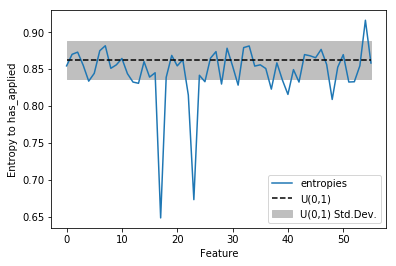

In [151]:
import scipy.stats

dfUser_Dropna25 = dfUser
dfUser_Dropna30 = dfUser

dfUser.dropna(subset= ['has_applied','v25'], inplace=True)
dfUser_Dropna30.dropna(subset = ['has_applied','v30','v1'], inplace=True)



entropies = []
for column in dfUserNoNan:
    entropies.append(scipy.stats.entropy(dfUserNoNan.has_applied,dfUserNoNan[column]))
    if entropies[-1] < 0.7:
        print('Column smaller than 0.7', column)

#Calc uniform reference value
entropyUniform    = np.mean([scipy.stats.entropy(dfUserNoNan.has_applied,np.random.uniform(size=2000)) for i in range(50)])
entropyUniformStd = np.std([scipy.stats.entropy(dfUserNoNan.has_applied,np.random.uniform(size=2000)) for i in range(50)])


entropy25 = scipy.stats.entropy(dfUser_Dropna25.has_applied,dfUser_Dropna25.v25)
entropy30 = scipy.stats.entropy(dfUser_Dropna30.has_applied,dfUser_Dropna30.v30)
entropy1 = scipy.stats.entropy(dfUser_Dropna30.has_applied,dfUser_Dropna30.v1)


print(entropy25)
print(entropy30,entropy1)

#Plotting
plt.plot(entropies[2:], label = 'entropies')
plt.fill_between(range(len(entropies[2:])), entropyUniform-entropyUniformStd, entropyUniform+entropyUniformStd, color = '0.75', label = 'U(0,1) Std.Dev.')
plt.plot(range(len(entropies[2:])),np.ones(len(entropies[2:]))*entropyUniform, '--',color = 'k',label = 'U(0,1)')
#plt.plot(18,entropy25)
#plt.plot(23,entropy30, markersize = 15)
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Entropy to has_applied')
plt.savefig('results/entropies.pdf')

## Feature selection - categorical data

In [77]:
#https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/


import sklearn

sklearn.feature_selection.mutual_info_classif()

AttributeError: module 'sklearn' has no attribute 'feature_selection'

,job_title_full,has_applied,has_applied,salary,company,user_id
0,Junior Manager Innovation Lab - France (M/F/D),1,1,51000.0,g,1
1,Junior Product Manager - Mobile,1,1,70000.0,b,2
2,Junior Brand Marketing Manager - Mobile (M/F/D),1,1,59000.0,g,3
3,Product Analyst - Pricing & Forecasting (M/F/D),1,1,NaN,d,4
4,Online Marketing Manager,1,1,64000.0,h,5


## Jobs Data Frame

In [182]:
dfJobsDummiesCompany = pd.get_dummies(dfJobs, columns=['company'])
dfJobsDummiesCompany.head()

dfAll_Company  = pd.get_dummies(dfAll, columns=['company'])

In [183]:
dfAll_Company.corr()

,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,v17,...,v9,salary,company_a,company_b,company_c,company_d,company_e,company_f,company_g,company_h
has_applied,1.000000,0.024147,-0.017162,-0.030218,0.011672,0.021725,-0.004660,-0.002335,-0.015920,0.012841,...,-0.020220,0.050925,0.027274,-0.031665,-0.038835,0.010643,0.027114,-0.017547,0.006154,0.015816
v1,0.024147,1.000000,0.017716,0.012478,0.005112,0.030013,-0.003393,-0.013926,-0.030818,-0.034218,...,-0.001096,-0.002472,-0.007362,-0.017203,-0.016895,0.006024,0.012041,0.016713,0.003025,0.002899
v10,-0.017162,0.017716,1.000000,0.019175,-0.004124,0.007820,0.011500,-0.001875,-0.054079,-0.057950,...,-0.032353,0.031667,-0.013194,-0.064746,0.006029,-0.019422,0.020435,0.046130,0.040427,-0.011997
v11,-0.030218,0.012478,0.019175,1.000000,-0.014317,0.018200,-0.010021,0.016663,0.017537,-0.018584,...,-0.025427,0.046485,-0.029939,0.018270,-0.016668,0.029696,-0.013378,0.017424,-0.005773,-0.002637
v12,0.011672,0.005112,-0.004124,-0.014317,1.000000,-0.014548,0.037597,0.033628,0.002408,-0.012459,...,0.005336,0.053395,0.001483,-0.044681,0.015550,0.026265,-0.000194,0.037362,-0.007435,-0.028807
v13,0.021725,0.030013,0.007820,0.018200,-0.014548,1.000000,-0.031788,0.002680,-0.005187,-0.009199,...,0.021841,0.041239,-0.010106,-0.010415,-0.003357,0.048131,-0.023622,0.023728,-0.003945,-0.022946
v14,-0.004660,-0.003393,0.011500,-0.010021,0.037597,-0.031788,1.000000,0.018577,0.009778,-0.032814,...,-0.012094,0.054009,-0.000935,-0.007885,0.001440,0.003078,-0.004721,-0.010041,0.034070,-0.013895
v15,-0.002335,-0.013926,-0.001875,0.016663,0.033628,0.002680,0.018577,1.000000,0.004227,-0.010232,...,0.053898,-0.037906,0.019150,0.039589,-0.019158,0.014522,0.005933,0.006961,-0.034657,-0.034873
v16,-0.015920,-0.030818,-0.054079,0.017537,0.002408,-0.005187,0.009778,0.004227,1.000000,-0.023658,...,0.025529,0.039405,0.008032,-0.000154,-0.008686,0.001139,0.013700,-0.009619,0.003303,-0.007923
v17,0.012841,-0.034218,-0.057950,-0.018584,-0.012459,-0.009199,-0.032814,-0.010232,-0.023658,1.000000,...,0.017983,0.025751,0.003956,-0.001704,0.014694,0.008128,-0.019053,0.002673,0.012979,-0.021452


In [203]:
dfJobs.nunique()

job_title_full     156
salary              21
company              8
user_id           2000
dtype: int64

In [186]:
dfAll_Company  = pd.get_dummies(dfAll, columns=['company','job_title_full'])
dfAll_Company.head()

,user_id,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,...,job_title_full_Senior Product Owner - NLP,job_title_full_Senior Reserch Scientist - NLP,job_title_full_Senior SEO Manager - (Remote) (m/f/d),job_title_full_Senior SEO Marketeer - (Remote),job_title_full_Senior SEO Marketing Manager - (Remote),job_title_full_Senior Shop Manager - New Ventures,job_title_full_Senior Software Developer - (Remote),job_title_full_Senior Software Engineer,job_title_full_Senior Sustainability Manager,job_title_full_Senior UI Designer
0,U1,1,0.620573,0.018662,0.100803,0.080898,0.420417,0.817681,0.147355,0.446812,...,0,0,0,0,0,0,0,0,0,0
1,U2,1,0.972502,0.870277,0.504887,0.995163,0.179480,0.608719,0.245085,0.851246,...,0,0,0,0,0,0,0,0,0,0
2,U3,1,0.240756,0.546440,0.521399,0.402420,0.640444,NaN,0.184515,0.395058,...,0,0,0,0,0,0,0,0,0,0
3,U4,1,0.004854,0.433188,0.250801,0.242680,0.713586,0.210186,0.977472,0.375024,...,0,0,0,0,0,0,0,0,0,0
4,U5,1,0.835250,0.476812,0.764354,0.449753,0.524924,0.807181,0.294023,0.475043,...,0,0,0,0,0,0,0,0,0,0
